# 线性代数：机器学习背后的优化原理

        
线性代数作为数学的一个分支，广泛应用于科学和工程中，掌握好线性代数对于理解和从事机器学习算法相关工作是很有必要的，尤其对于深度学习算法而言

In [9]:
# import相关库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## 1、标量，向量，矩阵，张量

**首先，让我们回顾下基本的定义：**

- 标量（scalar）：形式而言，一个标量是一个单独的数，常用斜体的小写变量名称来表示。_v_

- 向量（vector）：形式而言，一个向量是一列有序数，常用粗体的小写变量名称表示**v**，或者上面标记剪头$\vec{v}$ 

- 矩阵（matrix）：形式而言，一个矩阵是一个二维数组，常用大写变量名称表示A，表示内部的元素则会使用$A_{i,j}$

- 张量（tensor）：形式而言，一个张量是一个多维数组，常用粗体的大写字母变量名称表示**T**，表示内部的元素则会使用$A_{i,j,z}$ 等等

用图片直观的显示区别如下
<img src="images/diff.png" width="500">

**接下来让我们回顾下基本的运算：**

- 加法
<img src="images/add.png" width="500">

- 标量乘法
<img src="images/scmu.png" width="400">

- 转置
<img src="images/trans.png" width="370">

- 矩阵向量乘法（内积，人工智能中常见的拼写：matrix product 或者 dot product） 
<img src="images/mul.png" width="570">

**线性方程组：**

由矩阵乘法也演变出了我们最常见的线性方程组，已知矩阵与未知向量的乘积，等于另一个已知向量，通过此方程组可求解那个未知向量，一般写为x，具体如下表示。
等式左侧可以这么来理解：
<img src="images/axb.png" width="400">
列为具体的矩阵来看：
$$
\begin{bmatrix}
    A_{1,1} & A_{1,2} & \cdots & A_{1,n} \\\\
    A_{2,1} & A_{2,2} & \cdots & A_{2,n} \\\\
    \cdots & \cdots & \cdots & \cdots \\\\
    A_{m,1} & A_{m,2} & \cdots & A_{m,n}
\end{bmatrix}
\times
\begin{bmatrix}
    x_1 \\\\
    x_2 \\\\
    \cdots \\\\
    x_n
\end{bmatrix}
=
\begin{bmatrix}
    b_1 \\\\
    b_2 \\\\
    \cdots \\\\
    b_m
\end{bmatrix}
$$

或者更简单的表示为

$$Ax=b$$

既然有未知数，那么自然需要求解未知数，而我们的未知数需要满足所有方程，也不是一直都有解的，下面来列我们二维矩阵所组成的方程解的情况,若两条线平行不存在焦点，那么说明没有一个$x_1$, $x_2$同时满足两个方程，则此方程组无解，同理，若相交，则有一个解，若完全相等，则有无穷个解。
<img src="images/axbsolu.png" width="570">

### 基本运算并绘图
例题 $\vec{v}$ + $\vec{w}$

$\hspace{1cm}\vec{v} = \begin{bmatrix} 1\\ 1\end{bmatrix}$


$\hspace{1cm}\vec{w} = \begin{bmatrix} -2\\ 2\end{bmatrix}$

结果需要先使用numpy计算向量运算结果，并用LaTeX公式表示：

$\hspace{1cm}\vec{v}+\vec{w} = \begin{bmatrix} -1\\ 3\end{bmatrix}$

并使用matlibplot绘制出(图表颜色样式不要求)

<img src="images/add_e.png" width="300">

**根据上面例题展示，计算并绘制  $2\vec{v}$ - $\vec{w}$  的结果**

$\hspace{1cm}\vec{v} = \begin{bmatrix} 4\\ 1\end{bmatrix}$


$\hspace{1cm}\vec{w} = \begin{bmatrix} -1\\ 2\end{bmatrix}$

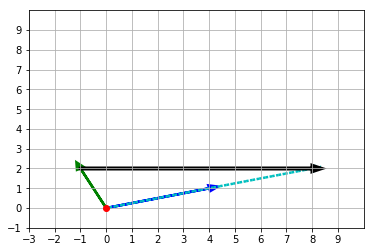

In [10]:
vec_v = np.array([4,1])
vec_w = np.array([-1,2])
a = 2
vec_av = 2*vec_v
result_vec = vec_av - vec_w

ax = plt.axes()

ax.plot(0,0,'or')
#绘制向量v
ax.arrow(0, 0, *vec_v, color='b', linewidth=2.5, head_width=0.30, head_length=0.35)
#绘制向量2v
ax.arrow(0, 0, *vec_av, color='c', linestyle='dotted', linewidth=2.5, head_width=0.30, 
         head_length=0.35)
#绘制向量w
ax.arrow(0, 0, *vec_w, color='g', linewidth=2.5, head_width=0.30, head_length=0.35)
#绘制向量2v-w
ax.arrow(vec_w[0], vec_w[1], *result_vec, color='k', linewidth=3.5, head_width=0.30, head_length=0.35)

plt.xlim(-3, 10)

major_xticks = np.arange(-3, 10)
ax.set_xticks(major_xticks)


plt.ylim(-1, 10)

major_yticks = np.arange(-1, 10)
ax.set_yticks(major_yticks)

plt.grid(b=True, which='major')
plt.show()

方程组求解讲解：
$$
\begin{cases}
y = 2x + 1\\\\
y = 6x - 2
\end{cases}
$$
用matplotlib绘制图表
<img src="images/2equ_solu.png" width="300">
由上可知此方程组有且仅有一个解

需使用numpy（或自写算法）计算该解的结果
$$
\begin{cases}
x = \frac{3}{4} \\\\
y = \frac{5}{2}
\end{cases}
$$


**根据上面例题展示，绘制方程组，说明是否有解是否为唯一解，若有解需计算出方程组的解**
$$
\begin{cases}
y = 2x + 1\\\\
y = \frac{1}{10}x+6
\end{cases}
$$

**方程组的解，有唯一解**
$$
\begin{cases}
x = {2.63157895} \\\\
y = {6.26315789}
\end{cases}
$$


Vector is within span.
Scalars in s: [2.63157895 6.26315789]


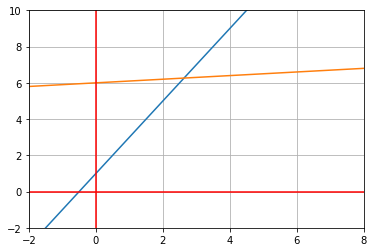

In [11]:
def check_vector_span(set_of_vectors, vector_to_check):
    vector_of_scalars = np.asarray([None]*set_of_vectors.shape[0])
    try:
        vector_of_scalars = np.linalg.solve(set_of_vectors, vector_to_check)
        if not (vector_of_scalars is None):
            print("\nVector is within span.\nScalars in s:", vector_of_scalars)
 
    except Exception as exception_type:
        if str(exception_type) == "Singular matrix":
            print("\nNo single solution\nVector is NOT within span")
        else:
            print("\nUnexpected Exception Error:", exception_type)
    return vector_of_scalars

v_mat = np.array([[2, -1], [1, -10]]) 
t_vec = np.array([-1, -60])
result = check_vector_span(v_mat,t_vec)


x = np.arange(-10, 10)
y1 = 2*x + 1
y2 = (1/10)*x + 6
plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlim(-2, 8)
plt.ylim(-2, 10)

plt.axvline(x=0,color='r');
plt.axhline(y=0,color='r');
plt.grid(b=True, which='major')
plt.show()

## 迹运算
迹运算返回的是矩阵对角元素的和，如图所示
<img src="images/matrix.png" width="360">
写成数学公式为：
$$ \large Tr(A) = \sum_{i}A_{i,i}$$

**说明题：**

使用numpy验证
$$
\large Tr(ABC) = Tr(CAB) = Tr(BCA)
$$
其中
$$
A=
\begin{bmatrix}
    7 & 6 \\\\
    29 & 3
\end{bmatrix}
$$

$$
B=
\begin{bmatrix}
    2 & -8 \\\\
    9 & 10
\end{bmatrix}
$$

$$
C=
\begin{bmatrix}
    2 & 17 \\\\
    1 & 5
\end{bmatrix}
$$

In [ ]:
A = np.array([[7,6],[29,3]])
B = np.array([[2,-8],[9,10]])
C = np.array([[2,17],[1,5]])
tr_ABC = A.dot(B).dot(C).trace()
tr_CAB = C.dot(A).dot(B).trace()
tr_BCA = B.dot(C).dot(A).trace()
print(tr_ABC,tr_CAB,tr_BCA)

## 衡量向量以及矩阵的大小：范数与条件数

### 范数的定义

在线性代数等数学分支中，范数（Norm）是一个函数，其给予某向量空间（或矩阵）中的每个向量以长度或称之为大小。对于零向量，其长度为零。直观的说，向量或矩阵的范数越大，则我们可以说这个向量或矩阵也就越大。有时范数有很多更为常见的叫法，如绝对值其实便是一维向量空间中实数或复数的范数，范数的一般化定义：设$p\ge 1$，p-norm用以下来表示


$$ \large {\Vert x \Vert}_{p} =  \lgroup {\sum_{i}{\vert x_i \vert}^p }\rgroup ^{\frac{1}{p}}$$

此处，当p=1时，我们称之曼哈顿范数(Manhattan Norm)。其来源是曼哈顿的出租车司机在四四方方的曼哈顿街道中从一点到另一点所需要走过的距离。也即我们所要讨论的L1范数。其表示某个向量中所有元素绝对值的和。 而当p=2时，则是我们最为常见的Euclidean norm。也称为Euclidean distance，中文叫欧几里得范数，也即我们要讨论的L2范数，他也经常被用来衡量向量的大小。 而当p=0时，严格的说此时p已不算是范数了，L0范数是指向量中非0的元素的个数，但很多人仍然称之为L0范数（Zero norm零范数）。 这三个范数有很多非常有意思的特征，尤其是在机器学习中的正则化（Regularization）以及稀疏编码（Sparse Coding）有非常有趣的应用，这个在进阶课程可以做更深入的了解。

**L0 范数**
$$ \large \Vert x \Vert = \sqrt[0]{\sum_i x_i^0} = \#(i|x_i \neq0) $$
**L1 范数**
$$ \large {\Vert x \Vert}_{1} =  \lgroup {\sum_{i}{\vert x_i \vert} }\rgroup $$
**L2 范数**
$$ \large {\Vert x \Vert}_{2} =  \lgroup {\sum_{i}{\vert x_i \vert}^2 }\rgroup ^{\frac{1}{2}}$$

另外这里还存在特例：
 当 $ p -> \infty $ 时，我们称之为 $ L^{\infty} $范数，也被称为“maximum norm（max范数）”，这个范数表示向量中具有最大幅度的元素的绝对值：

$$ \large {\Vert x \Vert}^{\infty} =  \max_{i}{\vert x_i \vert} $$

[以上资料部分参考wiki](http://t.cn/RINHvvt)

### 计算向量的范数
编写一个函数来计算一下向量的各种范数。

In [ ]:
# 实现这里向量范数计算的函数，要求可以计算p = 0,1,2,3 ... 无穷 情况下的范数

""" 计算向量的范数
    参数
        x: 向量 numpy数组 或者list数组
        p: 范数的阶，int型整数或者None
        infty: 是否计算max范数，bool型变量，True的时候表示计算max范数，False的时候计算p范数
        
    返回
        向量的范数，float类型数值
    
"""
def calc_Norm(x, p = 2, infty = False):
    x_array = np.array(x, dtype=np.float64)
    result = 0.0
    if infty:
        result = np.linalg.norm(x_array, np.inf)
    else:
        result = np.linalg.norm(x_array,p)

    return result

### 计算矩阵的范数
我们也需要衡量矩阵的大小，对于矩阵大小的衡量在很多优化问题中是非常重要的。而在深度学习中，最常见的做法是使用Frobenius 范数(Frobenius norm)，也称作矩阵的F范数，其定义如下：

$$ \large {\Vert A \Vert}_{F} =  \sqrt {\sum_{i,j}{\vert A_{i,j} \vert}^2 } $$

我们这里继续来计算一下F范数

In [ ]:
""" 计算向量的范数
    参数
        A: 给定的任意二维矩阵 list或者numpy数组形式
        
    返回
        矩阵的Frobenius范数，float类型数值
    
"""
def calc_Frobenius_Norm(A):
    test_sample = np.array(A, dtype=np.float64)
    return np.sqrt(np.square(test_sample).sum()) #或者np.linalg.norm(test_sample,"fro")

### 计算矩阵的条件数
矩阵的条件数(condition number)是矩阵（或者它所描述的线性系统）的稳定性或者敏感度的度量，我们这里为了简化条件，这里只考虑矩阵是奇异矩阵的时候，如何计算以及理解条件数(condition number):

当矩阵A为奇异矩阵的时候，condition number为无限大；当矩阵A非奇异的时候，我们定义condition number如下：

$$ \large \kappa{(A)} =  {\Vert A \Vert}_F {\Vert A^{-1} \Vert}_F$$

[奇异矩阵，非奇异矩阵](https://zh.wikipedia.org/wiki/%E9%9D%9E%E5%A5%87%E5%BC%82%E6%96%B9%E9%98%B5)

计算矩阵的条件数

In [ ]:
""" 计算矩阵的条件数
    参数
        A: 给定的任意二维矩阵 list或者numpy数组形式
        
    返回
        矩阵的condition number,
    
"""
def calc_Condition_Number(A):
    A_mat_inv = np.linalg.inv(A)
    return calc_Frobenius_Norm(A)*calc_Frobenius_Norm(A_mat_inv)

v_mat = np.array([[1, 2], [2, 4.001]]) 
t_vec = np.array([1.001, 2.001])
result = check_vector_span(v_mat,t_vec)

** 条件数越大时候，当方程组AX=b，b哪怕发成很小的改变，x的解也会有大的改变，反之，当条件数越小，b产生微小的改变，
x的解也是只有微小的改变。条件数的大小充分反映了矩阵计算的稳定性 **

考虑更为通用的一种情况，我们计算一个典型的线性回归系统: 

$$ Ax = b $$

可以简单推导得出其闭式解为：$ x=(A^TA)^{−1}A^Tb $ ，如果 $A^TA$可逆

推导过程： 

1.等式两边乘以$A^T$
$$ A^TAx = A^Tb $$
2.等式两边乘以$(A^TA)^{-1}$
$$ (A^TA)^{-1}A^TAx = (A^TA)^{−1}A^Tb $$
3.因为$A^{-1}A = I$，两边约去即可得：
$$ x=(A^TA)^{−1}A^Tb $$


当我们需要拟合的数据A满足数据量远远小于特征数目的时候，也就是A矩阵的行数 << A矩阵的列数的时候，因为$A^TA$不是奇异矩阵，此时方程组不存在闭式解；那么我们该如何重新构造$A^TA$，使得该闭式解成立？
我们知道对于高斯消去法来说，如果主对角线上的元素很小，在计算时就会表现出病态的特征，也就是会出现很大的方程解的大变动。

1. 单位矩阵的condition number是最低的，是最为稳定的；

2. 如果要使得该系统存在闭式解，那么就必须使得求逆运算是可以进行的，也就是说重新构造的$A^TA$必须是可逆的方阵；

3. 重新构造的方式可以是在$A^TA$基础上进行加或者减或者乘除相关矩阵的操作；

一种可行的方式就是：
$$ x = (A^TA+\lambda I)^{−1}A^Tb $$
增加一个正则项$\lambda I$，就可以改变$A^TA$对角线的元素值，这样就能控制方程解的变化程度

实际上我们最为常用的[Ridge Regression](http://scikit-learn.org/stable/modules/linear_model.html)和 L2范数以及condition number之间某种程度上是可以相互推导的：

首先，Ridge Regression的损失函数为：
$$ J_x = min({\Vert Ax -y \Vert}^2 + \alpha {\Vert x \Vert}^2) $$
我们展开这个损失函数：
$$ {\Vert Ax -y \Vert}^2 + \alpha {\Vert x \Vert}^2  =  (Ax -y)^T (Ax-y) + \alpha x^Tx$$
由于这里是一个凸函数，我们令导数等于零，即为最小值的解，求导可得：
$$ A^T (Ax-y) + \alpha x = 0 $$

整理即可得到：
$$ x = (A^TA+\lambda I)^{−1}A^Tb $$

## 5、SVD(奇异值分解)

[SVD](https://en.wikipedia.org/wiki/Singular-value_decomposition)是Singular value decomposition的缩写，称为奇异值分解，是分解矩阵的一种方式，会将矩阵分解为奇异向量（singular vector）和奇异值（singular value），分解的意义其实很明确，就是想将一个很大很复杂的矩阵，用更小更简单的几个子矩阵的相乘来表示，这些小矩阵描述的是矩阵的重要的特性。

那么SVD具体的数学表达是什么呢？

假设有一个矩阵C，我们可以将矩阵C分解为三个矩阵的乘积：
<img src="images/svd.png" width="480">

$$\large C = UDV^{T}$$


如果C是一个m x n的矩阵，那么U是一个m x m的矩阵，D是一个m x n的矩阵，V是一个n x n的矩阵，这些小矩阵并不是普普通通的矩阵，U和V都定义为正交矩阵，而D定义为对角矩阵。

SVD最常用的做法就是用来进行特征的降维以及矩阵的低秩重构，例如这里分别取矩阵U、D、VT的前k列，如图示中的白色部分，然后重新计算新的C矩阵，即为k维度下的矩阵重构，这种方法被广泛应用于自然语言处理[LSA](https://en.wikipedia.org/wiki/Latent_semantic_analysis)、推荐系统[SVD++,FM,FFM](https://tech.meituan.com/deep_understanding_of_ffm_principles_and_practices.html)等领域，如有兴趣可以继续参考链接相关资料。
<img src="images/svd_decompostion.png" width="480">



### 使用numpy去计算任意矩阵的奇异值分解：

In [ ]:
""" 计算任意矩阵的奇异值分解
    参数
        A: 给定的任意二维矩阵 list或者numpy数组形式 
        
    返回
        使用numpy.linalg相关函数，直接返回分解之后的矩阵U,D,V
    
"""
def calc_svd(A):
    U,D,VT=np.linalg.svd(A)
    return U,D,VT